# Project: Medical Appointments No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this project is to analyze data associated with medical appointments in brazil, exploring the trends between patients who showed up for their appointments and those who didn't...emphasizing on the similaraties and differences between those two groups.

The original dataset used for this investigation is from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments); it collected information from 100k medical appointments in Brazil with the focus on the question of whether or not patients show up for their appointment.

### Data Dictionary 

**PatientID:** Identification of a patient <br>
**AppointmentID:** Identification of each appointment <br>
**Gender:** Male or Female <br>
**ScheduledDay:** The day the patient scheduled the appointment <br>
**AppointmentDay:** The actual appointment day, when they have to visit the doctor <br>
**Age:** How old is the patient <br>
**Neighbourhood:** the location where the appointment takes place <br>
**Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) <br>
**Hipertension:** indicates if the patient has hypertension <br>
**Diabetes:** indicates if the patient has diabetes <br>
**Alcoholism:** indicates if the patient is an alcoholic <br>
**Handcap:** indicates if the patient is handicaped <br>
**SMS_received:** 1 or more messages sent to the patient <br>
**No-show:** indicates if the patient showed up to their appointment or not . ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. <br>

### Questions

Since this dataset is mainly focused on the question of whether or not patients show up for their appointment, that will be the main question for the analysis. But since there are many different factors, they will be grouped into 3 categories...and sub-questions will be addressed for each category.

- **Category 1: Demographics** (Gender & Age) <br>
 Does gender relate to patients not showing up to their appointments? <br>
 Which age group has the highest no show ratio? <br>
<br>
- **Category 2: Health Problems** (Chronic Diseases & Alcoholism) <br>
 Do existing health conditions influence patients to show up to their appointments?
<br>
 
- **Category 3: Others** <br>
  Did patients show up more when recieving SMS messages? <br>
  Do patients enrolled in the welfare program show up more? <br>
  Are patients more likely to show up during a certain day of the week? <br>
  

In [677]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [54]:
#Loading dataset
df = pd.read_csv('noshow.csv')

#View dimensions of the dataset
df.shape

(110527, 14)

There are 110,527 records (appointments) and 14 asscociated variables in the dataset

In [55]:
#intial view of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#displays a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Initial Observations:**
- PatientID and AppoitmentID will be dropped since they will not be used in this analysis <br>
- Rename columns (translate to english, consistency of lowercase column names seperated by "_" following naming conventions <br>
- Convert data type of scheduled day and appointment day to datetime <br>
- Convert no-show for better performance and easier manupulation and handling <br>
- No missing values exist in the dataset <br>

In [13]:
#returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Erroneous age range (-1) and possible outliers - will look into that further below <br>
- The average age of patients is 37 years old
- Most patients are between 18 years old and 55 years old
- Most patients do not suffer from the conditions provided in the dataset <br>
- There are different values for handicap starting from 0 to 4. According to a [comment](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) by the owner of the dataset, this variable refers to the number of disabilities a person has. <br>
- Most patients are not enrolled in the welfare program (Scholarship)
- Maximum of one SMS is sent to the patient and approximately 32% of the population received an SMS <br>

To further explore the descriptive statistics, it's easier to look at histogram visualizations below. 

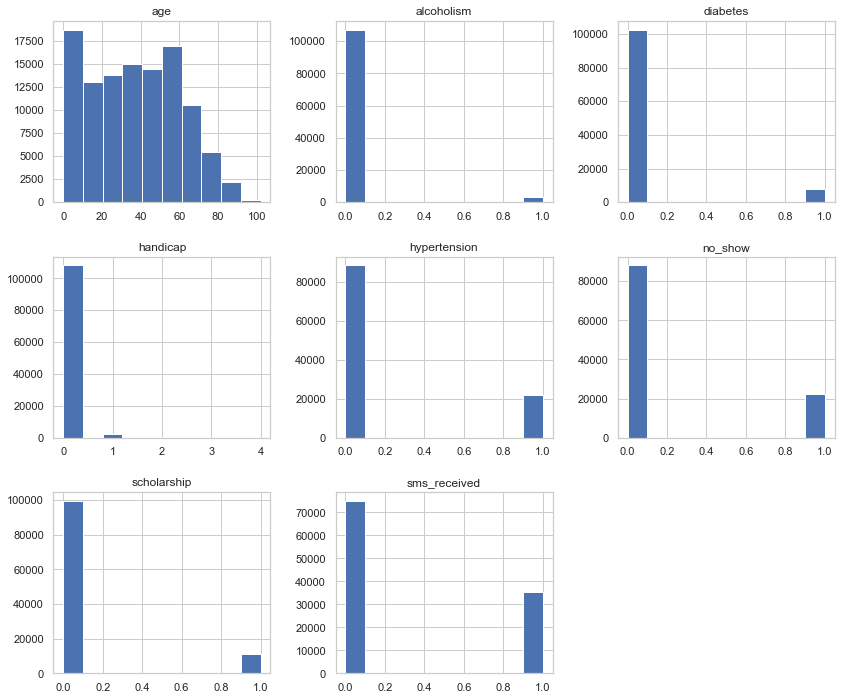

In [701]:
df.hist(figsize = (14,12));

- As we have noticied that most patients in this dataset do not have any hypertension or diabetes conditions, are not handicaped and do not suffer from alcoholism. <br>
- The number of patients with 2 or more disabilites is close to none <br>
- Starting from around 70 years old, the number of patients decrease.<br>
- Most Patients show up to their medical appointments.

In [21]:
#check number of unique values for neighborhood
print("There are {} unique neighborhoods".format(df['Neighbourhood'].nunique()))

There are 81 unique neighborhoods


In [23]:
#check for duplicates 
df.duplicated().sum()

0

No Duplicates are found in the dataset

In the next section, data cleaning will be performed based on the the above observations in this sequence:

- Dropping Extraneous Columns <br>
- Renaming Columns <br>
- Adding New Columns <br>
- Fixing Data Types <br>
- Getting rid of Erroneous Data & Outliers <br>

### Data Cleaning

#### Dropping Extraneous Columns
Some of the varibles in the dataset will not be useful for the analysis since they are irrelevent to the questions posed. These are PatientId and AppointmentID.

In [56]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### Renaming Columns
Column labels are all lowercased and seperated by underscore for two words or more. Furthermore,any Portuguese column labels are translated to English. 

In [57]:
df.columns = map(str.lower, df.columns)

In [58]:
df.rename(columns={'scheduledday':'schedule_day','appointmentday':'appointment_day',
                   'hipertension':'hypertension','handcap':'handicap','no-show':'no_show'},inplace=True)

#### Adding New Columns 

In [569]:
#creating new column for the appointment day of the week
df['appointment_dayofweek'] = df['appointment_day'].dt.day_name()

#check that the new column is added correctly
df.head()

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dayofweek
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


#### Fixing Data Types
- Convert schedule_day and appointment_day from string to datetime 
- Convert no_show to integer with values 1 and 0 corresponding to yes and no respectively. 

In [59]:
#convert schedule_day and appointment_day to datetime
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [60]:
#convert no_show to int
df['no_show'].replace({'Yes': 1, 'No': 0}, inplace=True)

It's a little bit counter-intuitive but as a reminder, 1 corresponds to patients who did not show up and 0 corresponds to those who did.
 

In [62]:
#checkpoint that all changes are applied as intended
df.head()

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110521 non-null  object             
 1   schedule_day     110521 non-null  datetime64[ns, UTC]
 2   appointment_day  110521 non-null  datetime64[ns, UTC]
 3   age              110521 non-null  int64              
 4   neighbourhood    110521 non-null  object             
 5   scholarship      110521 non-null  int64              
 6   hypertension     110521 non-null  int64              
 7   diabetes         110521 non-null  int64              
 8   alcoholism       110521 non-null  int64              
 9   handicap         110521 non-null  int64              
 10  sms_received     110521 non-null  int64              
 11  no_show          110521 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usag

#### Erroneous Data & Outliers
As shown above, the age column has minimum value of -1 which does not make much sense and should be removed. However, before taking that decision, let's look at the rows with this age value and whether it communicates a different story. In addition, age 115 could be a potential outlier so let's further explore that.

In [65]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [70]:
df.query('age == -1')

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


Since only 1 patient was found to have -1 age, the row will be removed. 

In [102]:
df = df[df['age'] > -1]

Now let's evaluate whether age has outliers.

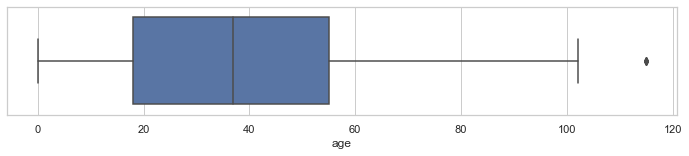

In [103]:
#Visualizing the age distibution  
plt.figure(figsize=(12,2))
sns.boxplot(df.age);

The data point located outside the right fence (whisker) of the visualization represents an outlier. The age of that patient(s) is the 115 - maximum value based on the descriptive statistics above. Let's identify the number of appointment made by patients aged 115 first.

In [112]:
df.query('age >= 115').count()['age']

5

Based on the above analysis, this outlier will be removed from the dataset.

In [117]:
#removing rows with age equals to 115
df = df[df['age'] < 115]

#check that the outlier is removed
df.query('age >= 115').count()['age']

0

Before we jump into exploratory data analysis, let's look at the percentage of those who showed up for their appointments vs those who didn't.

In [254]:
#creating masks for both show and no_show 
noshow = df.no_show == True
show = df.no_show == False

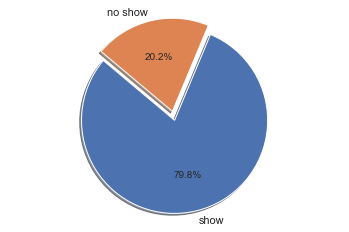

In [678]:
# Data to plot
labels = 'show', 'no show'
sizes = [show.mean(),noshow.mean()]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal');

In [253]:
#the number of patients who showed up vs those who did not
df[show].count()['age'], df[noshow].count()['age']

(88205, 22316)

Based on the pie chart above, approximately 20.2% did not show up for their appointments whilst 79.8% showed up. That is 22,316 patients missing out on their appointments and 88,205 patients going.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:  Does Gender Relate to Patients not Showing up to their Appointments?

In [470]:
#create a function for plotting a barchart 
def plot_bar(arr1,labelslist):
    ax = sns.countplot(x=arr1, hue='no_show', data=df)
    x = df[arr1].name
    plt.title('Show vs No Show by ' + x)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.legend(['Show', 'No Show'])
    ax.set_xticklabels(labelslist)
    plt.show();

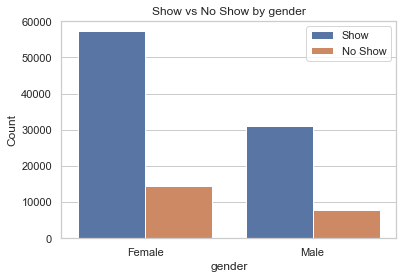

In [471]:
#use the plot_bar function to show the relationship between gender and no show/show
plot_bar('gender',['Female','Male'])

One can clearly observe that females have much more appointments than males but regarding showing up for an appointment or not, the ratio is quite similar. Below we will explore the exact proportions. <br>

In [534]:
# get appointment counts for show/no show patients by Gender
gender_count = df.groupby('gender')['no_show'].value_counts()
gender_count

gender  no_show
F       0          57243
        1          14591
M       0          30962
        1           7725
Name: no_show, dtype: int64

In [535]:
# get total appointment counts for each gender
total_count = df['gender'].value_counts()
total_count

F    71834
M    38687
Name: gender, dtype: int64

In [538]:
#proportion of appointment missed by female patients
female_proportion = gender_count['F']/total_count['F']
female_proportion[1]

0.2031210847231116

In [286]:
#proportion of appointment missed by male patients
male_proportion = gender_count['M']/total_count['M']
male_proportion[1]

0.19967947889471915

- Out of 71834 appointments scheduled by female patients, 14591 appointments were missed constituting with approximately 20% <br>
- Out of 38687 appointments scheduled by male patients, 7725 appointments were missed constituting with approximately 20%<br>


### Research Question 2: Which Age Group has the Highest No Show Ratio?

#### Age Distribution for patients who showed up and those who didn't

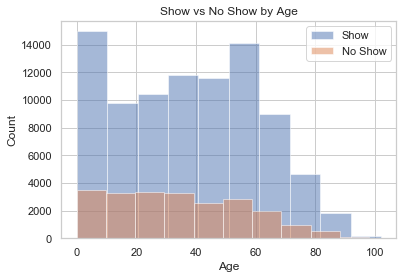

In [679]:
#plotting a histogram for age distribution
df.age[show].hist(alpha=0.5, label='show')
df.age[noshow].hist(alpha=0.5, label='no show')
plt.title('Show vs No Show by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Show', 'No Show']);

The correlation between age and showing up to medical appointments appears to be weak and no trend or insights could be observed. However, let's take a closer look at the exact proportions below. 

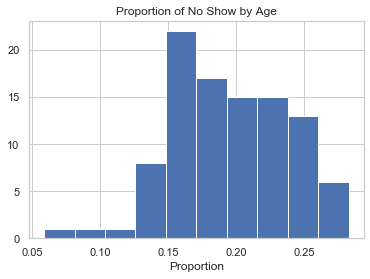

In [673]:
# visualize the proportions of no show 
df_age_ratio = df[noshow].groupby(['age']).size()/df.groupby(['age']).size()
df_age_ratio.hist();
plt.title('Proportion of No Show by Age')
plt.xlabel('Proportion');

Most proportions of no show lie between 0.15 and 0.25. 0.15 is the proportion with the highest number of ages and then it skewes to the right. 

In the following step, we will classify ages into 4 different groups based on the Age Categories, Life Cycle Grouping of [StatCan](https://www.statcan.gc.ca/eng/concepts/definitions/age2). The data will be explored from a different dimension to understand whether a certain age group is more likely to not show for their medical appointments.

**Children:** 0-14 years <br>
**Youth:** 15-24 years <br>
**Adults:** 25-64 years <br>
**Seniors:** 65 years and over <br>

In [659]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1,14,24,64,110]

# Labels for the four age groups
bin_names = ['Children','Youth','Adults','Seniors'] 

In [660]:
# Creates acidity_levels column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dayofweek,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Adults
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Adults
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Adults
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Children
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Adults


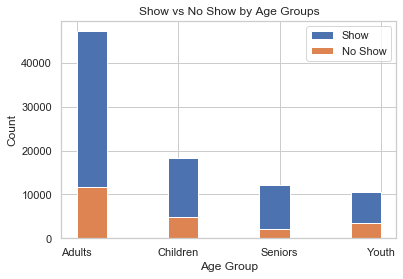

In [675]:
#Visualize the show and no show count for each age group
df.age_group[show].hist(label='show')
df.age_group[noshow].hist(label='no show')
plt.title('Show vs No Show by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Show', 'No Show']);

In [668]:
#calculating the proportion of each age group
df_agegroup_ratio = df[noshow].groupby(['age_group']).size()/df.groupby(['age_group']).size()
df_agegroup_ratio

age_group
Children    0.211807
Youth       0.252677
Adults      0.197428
Seniors     0.154893
dtype: float64

Adults have the highest number of appointments scheduled followed by children, seniors and youth. Regarding the no show percentages, Seniors have the lowest percentage of approximately 15%, followed by Adults 20%, Children 21% and finally Youth with the highest no show percentage 25% out of the 4 groups.

### Research Question 3: Do Existing Health Conditions influence Patients to show up to their appointments?

Just a quick recap, most patients of this dataset have no chronic diseases and do not suffer from alcoholism as we have seen in the histograms in the above data wrangling section of this notebook. However, let's explore whether having a chronic disease or being an alcoholic has a positive relationship with showing up to medical appointments.

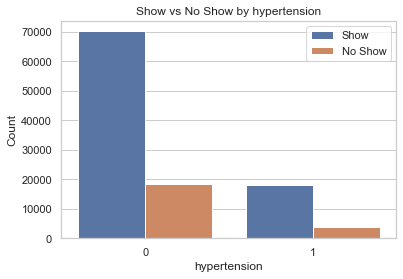

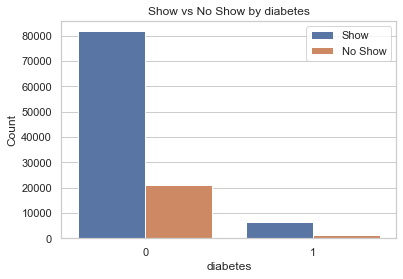

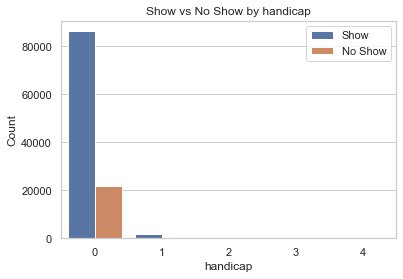

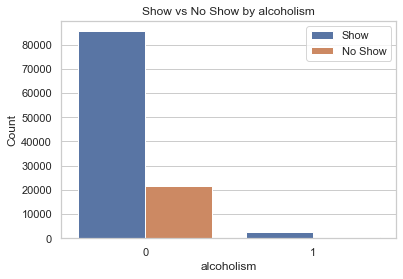

In [495]:
#create a list of our categorical variables
diseases_alcohol_list = ['hypertension', 'diabetes', 'handicap','alcoholism']

#looping through each variable to plot its histogram
for var in diseases_alcohol_list:
    plot_bar(var, sorted(df[var].unique()))

- Based on the above histograms, the show and no show trends are similar. Correlation between chronic diseases and showing up for medical appointments cannot be established; the percentage of patients showing up is around 80% across the chronic diseases categories. This also applies on alcoholism as shown above. 
<br>

### Research Question 4: Did Patients Show up more when Recieving SMS Messages?

SMS messages serve as reminder for patients especially when the appointments have been scheduled far in advance. Let's explore the show and no show patient count for those who have received SMS messages and those who didn't.

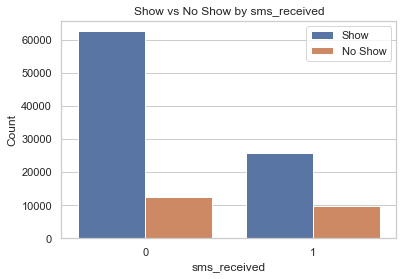

In [693]:
#using the plot_bar function for the sms_received variable
plot_bar('sms_received', sorted(df['sms_received'].unique()))

In [697]:
#calculating the proportions of patients who received a SMS and did not show up
proprtion_sms_noshow = df[noshow].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
proprtion_sms_noshow

sms_received
0    0.167004
1    0.275753
dtype: float64

It turns out quite the opposite; Out of all the patients whom have received and SMS, approximately 28% have missed their appointment.On the other hand, out of the patients that have not recieved any SMS messages,approximately 17% have missed their appointment. 

It might be one of the strongest factors so far that could be further used to understand if a patient will show up for their scheduled appointments. However, no direct conclusions can be made about this since the context of these SMS messages were not explained and whether they are actually reminders or not

### Research Question 5: Do Patients Enrolled in the Welfare Program Show up More?

What about those patients that are enrolled in the brasilian welfare program "Bolsa Família", do they tend to show up for their scehduled appointments? We will be exploring how this factor might influence showing up rates.

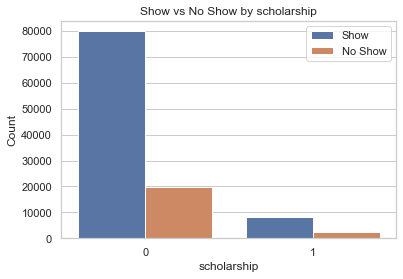

In [700]:
#using the plot_bar function for the Scholarship variable
plot_bar('scholarship', sorted(df['scholarship'].unique()))

In [699]:
#calculating the proportions of patients who are enrolled in the program and did not show up
proprtion_scholarship_noshow = df[noshow].groupby(['scholarship']).size()/df.groupby(['scholarship']).size()
proprtion_scholarship_noshow

scholarship
0    0.198053
1    0.237363
dtype: float64

Out of all the patients enrolled in the welfare program (Scholarship), approximately 24% did not show up for there appointments. In contrast, approximately 20% did not show up out of those who are not enrolled. To evalute the signaficance of this approximate difference, statistical test should be further conducted. 

### Research Question 6: Are Patients More Likely to Show up during a Certain Day of the Week?

To determine whether there is a certain pattern of showing up for medical appointments based on the week day or not.

In [608]:
#using a ordered categorical to sort based on week day sequence 
from pandas.api.types import CategoricalDtype
week_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_type = CategoricalDtype(categories=week_index, ordered=True)
df['appointment_dayofweek'] = df['appointment_dayofweek'].astype(week_type)

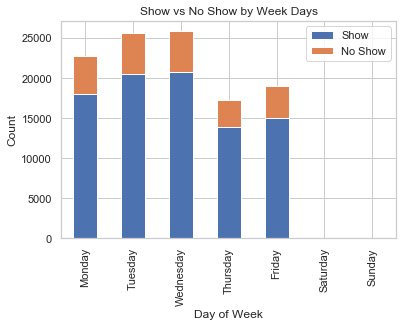

In [620]:
#create the stacked bar chart
df2 = df.groupby(['appointment_dayofweek','no_show'])['appointment_dayofweek'].count().unstack('no_show')
df2.plot(kind='bar', stacked=True)
plt.title('Show vs No Show by Week Days');
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(['Show', 'No Show']);

Appointments were mostly scheduled on Tuesdays and Wednesdays, followed by Mondays. Also there are no appointments on  Sundays and very low number of appointments on Saturdays during the time period of this dataset. No correlation could be observed or any trend regarding not showing up on particular day(s) of the week,deeming this as unimportant/irrelevent factor for understanding patients behavior in this dataset.

In [640]:
#calculating proportion of no show based on day of the week
df[noshow].groupby(['appointment_dayofweek']).size()/df.groupby(['appointment_dayofweek']).size()

appointment_dayofweek
Monday       0.206455
Tuesday      0.200936
Wednesday    0.196892
Thursday     0.193447
Friday       0.212273
Saturday     0.230769
Sunday            NaN
dtype: float64

However, on Thursday, the no show is slightly less than other days with approximately 19% (one percent difference than the second to last lowest percentage of 20%). And Saturday has the highest percentage 23% although it has the lowest number of appointments made.

<a id='conclusions'></a>
## Conclusions

To summarize, some of the independent variables in the dataset have been explored relative to the dependet variable "No Show" to uncover insights and use the power of data visualization to highlight trends. The results do not imply any cause and effect relationship but just shed light onto the correlations between the variables and the behavior of patients limited to this dataset.

- Approximately 20.2% did not show up for their appointments.<br>
- Women scheduled much more medical appointments compared to men; however, the no show ratio of both gender were the same. 
<br>
- Adults have the highest number of overall appointments but Youth have the highest no show percentage. 
<br>
- Patients with and without exisiting health problems (hypertension, diabetes, handicap, alcoholism) had similar no show rates compared to patients without any conditions. 
<br>
- Patients who have received SMS messages had a higher no show ratio compared to those who did not receive messages.<br>
- Patients enrolled in the welfare program (Scholarship) had higher a no show percentage compared to those who didn't. <br>
- Appointments were mostly scheduled on Tuesdays and Wednesdays, but Saturday had the highest no show percentage out of all week days. <br>

### Limitations

- This dataset can not be used to estimate the no show rates for the population of Brazil or even be applied on a larger population. It depicts only a certain snapshot with specific timeframes and patients with similar charcteristics; results can not be generalized.

- The aim was to just uncover trends and insights within the scope of the dataset. In order to predict patient behavior, machine  learning alghorithms should be used along with advanced statistical tests. At the end of the day, correlation does not imply causation.

- The dataset does not take into consideration other important factors that could influence patients not showing up for there medical appointments. More details about the appointments themselves and medical centers/hospitals is also missing.

- The patient ID columnn was hard to figure out and could have been explored if there were more details about how the data was collected. 

### References

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
- https://chrisalbon.com/python/data_wrangling/pandas_lowercase_column_names/
- https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
- https://pythonspot.com/matplotlib-pie-chart/
- https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
- http://queirozf.com/entries/matplotlib-examples-displaying-and-configuring-legends
- https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm
- https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
- https://stackoverflow.com/questions/56794101/stacked-bar-plot-from-dataframe-using-groupby
- https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday